#  Genetic Toggle Switch

![genetic-toggle-switch](../pics/genetic-toggle-switch.png)
$\left\{
\begin{array}{l}
\dot{x} = \frac{\alpha_1}{1 + \left(\frac{y}{K_1}\right)^{n_1}} - \gamma_1 x
\\
 \dot{y} = \frac{\alpha_2}{1 + \left(\frac{x}{K_2}\right)^{n_2}} - \gamma_2 y
\end{array}
\right.$

In [1]:
# this makes sure it starts looking for things from the top folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\ode_to_odes


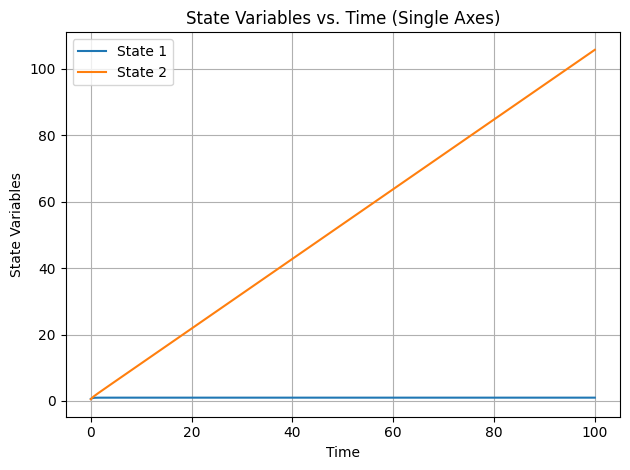

In [2]:
#  Imports
import numpy as np
from scipy.integrate import solve_ivp
from ode_helpers import state_plotter

#  Define derivative function
def f(t, y, c):
    ydot = [c[0]/(1+(y[1]/c[1])**c[2]) - c[3]*y[0], 
            c[4]/(1+(y[0]/c[5])**c[6]) - c[7]*y[1]]
    return ydot

#  Define time spans, initial values, and constants
tspan = np.linspace(0, 100, 500)
yinit = [.6, .5]
      
alpha1, alpha2 = (1, 2)
K1, K2 = (1, 1)
n1, n2= (5, 5)
gamma1, gamma2 = (0, 0)
c = (alpha1, K1, n1, gamma1, 
     alpha2, K2, n2, gamma2)
                  

#  Solve differential equation
sol = solve_ivp(lambda t,
                y: f(t, y, c),
                [tspan[0], tspan[-1]],
                yinit,
                t_eval=tspan,
                rtol = 1e-5)
#  Plot states
state_plotter(sol.t, sol.y)